<h1>The method of Maximum likelihood</h1>

<h2>Minimal distance</h2>

<p>
$\sum_{i=1}^N \, [y_i - f(x_i|a,b)]^2$
</p>
<p>
(silent assumption: a noise in $x$ is negligible)
</p>
<img src="minimal_distance.png"></img>

<h2>The definition</h2>

<p>
Assumption: every point is selected from a distribution.
</p>
<p>
For instance: $x_i \in \varphi(x_i| \bar{x},\sigma)$ in Normal distribution
</p>

<p>
Maximum likelihood (not the probability): $L = \Pi_{i=1}^N \varphi(\{y_i,x_i\}|\bar{x},\sigma)$
</p>

<p>Our goal is to maximize $L$ by adjusting parameters ($a,b$ for instance).</p>

<h2>The foundations</h2>
<p>
Conditional probability
</p>
<p>
$P(A|B) = \frac{P(AB)}{P(B)}$
</p>
<p>
The multiplication $P(AB) = P(A) P(B)$, if A and B are independent
<p>
<p>
$P_i = \int \varphi(x_i|a,b) dx$, so $dP_i = \varphi(x_i|a,b) dx$
</p>
<p>
The probability multiplication: $\Pi dP_i dx = dx \Pi dP_i = dx \Pi \varphi(x_i|.)$. ($dx$ arbitrary)
</p>

<h2>Arithmetical mean</h2>

$L = \Pi_{i=1}^N \frac{1}{\sqrt{2\pi} \sigma} \exp\left(-\frac{(x_i - \bar{x})^2}{2\sigma^2}\right)$

$\ln L = -\sum_{i=1}^N \frac{(x_i - \bar{x})^2}{2\sigma^2} - N \ln \sigma  - \frac{N}{2} \ln 2\pi$

<p>
Parameter adjust to locate maximum of $\ln L$: 
</p>
<p>
$\frac{d \ln L}{d \bar{x}} = \sum_{i=1}^N \frac{x_i - \bar{x}}{\sigma^2} = 0$
</p>
<p>
$\sum_{i=1}^N (x_i - \bar{x}) = 0$, so
</p>
<p>
$\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$
</p>

<p>
The adjust for $\sigma$ (dispersion, also "standard deviation"):
</p>
<p>
$\frac{d \ln L}{d \sigma} = \sum_{i=1}^N \frac{(x_i - \bar{x})^2}{\sigma^3} - \frac{N}{\sigma}$, so
</p>
<p>
$\sigma^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2$
</p>

<h2>Statistical errors of the parameters</h2>

<p>
The substitution $l = \ln L$
</p>

$l(x) = l(\bar{x}) + l'(\bar{x})(x - \bar{x}) - \frac{1}{2} l''(\bar{x})(x - \bar{x})^2 + \ldots$ (negative sign is a convention)

<p>Vicinity of minimum: $l'(\bar{x}) = 0$, so $ l(x) - l(\bar{x}) \approx -\frac{1}{2} l''(\bar{x})(x - \bar{x})^2 $</p>

<p>
More detailed: $\ln L(x)/L(\bar{x}) = -\frac{l''}{2} \sum_{i=1}^N (x_i - \bar{x})^2$
</p>

<p>
We've the new distribution $L(x) \propto \exp \frac{-l'' (x - \bar{x})^2}{2}$
</p>

<p>
The new distribution with error of $\bar{x}$ parameter is $\sigma^2_{\bar{x}} = 1 / l''$ is Normal distribution $N(\bar{x},\sigma^2_{\bar{x}})$
</p>

$\frac{d^2 \ln L}{d \bar{x}^2} = -\sum_{i=1}^N \frac{1}{\sigma^2} = - N / \sigma^2$


<p>
$\sigma_{\bar{x}}^2 = \sigma^2 / N$
</p>
(known as "statistical error of arithmetic mean", the sign convence)

The result of measurement is in the interval $\bar{x} - \sigma_{\bar{x}} < X < \bar{x} + \sigma_{\bar{x}}$ with 68% probability. $2\sigma_{\bar{x}}$ for 95%, and $3\sigma_{\bar{x}}$ for 99%.

<p>
Similary for error of $\sigma$ is $\sigma \pm \sigma / \sqrt{N/2}$
</p>

<h2>Numerical example</h2>

In [94]:
import math
import numpy as np
x = np.random.normal(0,1,100)
print("mean:",x.mean())
print("stdandard deviation",x.std())


mean: 0.00831961967936
stdandard deviation 1.04934619362


In [95]:
def like(x,x0,sig):
    N = x.size
    return -np.sum((x-x0)**2)/2/sig**2 - N*math.log(sig) - N/2*math.log((2*math.pi))

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

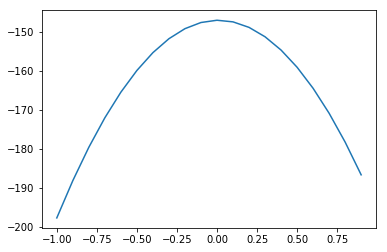

In [96]:
x0  = np.arange(-1,1,0.1)
hood = np.zeros(x0.size)
for i in range(0,x0.size):
  hood[i] = like(x,x0[i],1)
plt.plot(x0,hood)

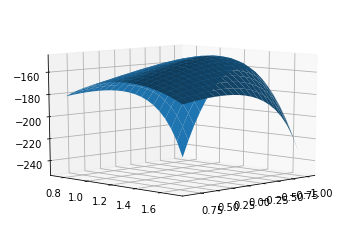

In [107]:
#def loglike(x,x0,sig):
#    return -(x-x0)**2/2/sig**2 - math.log(sig) - math.log(2*math.pi)/2

a = np.arange(-1,1,0.1)
b = np.arange(0.75,1.75,0.05)
w = a.size
h = b.size
N = x.size
lk = np.zeros((w,h))
for i in range(0,w):
    for j in range(0,h):
        x0 = a[i]
        sig = b[j]
        #lk[i,j] = a[i] + b[j]
        #lk[i,j] = -np.sum((x-x0)**2/2/sig**2) - N*math.log(sig) - N/2*math.log((2*math.pi))
        lk[i,j] = like(x,a[i],b[j])
a,b = np.meshgrid(a,b)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(10,45)
ax.plot_surface(a,b,lk)

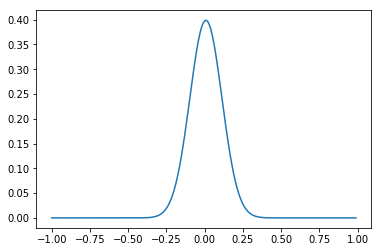

In [115]:
t = np.arange(-1,1,0.01)
mean = x.mean()
stddev = x.std()
stderr = stddev / math.sqrt(x.size)
f = np.exp(-(t-mean)**2/2/stderr**2)/math.sqrt(2*math.pi)
plt.plot(t,f)

In [217]:
import scipy.stats
print(
scipy.stats.norm.cdf(1) + scipy.stats.norm.cdf(-1),
scipy.stats.norm.cdf(2) - scipy.stats.norm.cdf(-2),
scipy.stats.norm.cdf(3) - scipy.stats.norm.cdf(-3),
    )
print(scipy.stats.norm.pdf(1),scipy.stats.norm.pdf(2),scipy.stats.norm.pdf(3))

1.0 0.954499736104 0.997300203937
0.241970724519 0.0539909665132 0.00443184841194


In [137]:
z = (x - mean) / stderr

<p> Solving:
$2 = (x - \bar{x}) / \sigma_{\bar{x}}$
gives $x = \bar{x} + 2 \sigma_{\bar{x}} \approx 0.2$.
</p>

<h2>The case of stright line</h2>

<p>
The equation ($a,b$ as parameters):
$$
y = a + b x
$$
</p>

<p>
The maximum likelihood 
$$
L(x_i|a,b) = \Pi_{i=1}^N \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{[y_i - (a + b x_i)]^2}{2}\right)
$$
($\sigma = 1$ is set for simplicity).
</p>

<p>
Maximalisation of $\ln L$, or minimisation of sum of squares $S$:
$$
S(x_i|a,b) = \sum_{i=1}^N [y_i - (a + bx_i)]^2
$$
</p>

<p>We're solving the system of linear equations:
$$
\begin{array}{cc}aN + b\sum x_i\\ a \sum x_i + b \sum x_i^2 \end{array}
=
\begin{array}{c} \sum y_i\\ \sum y_i^2\end{array}
$$
</p>


In [153]:
# the line with N(0,1) noise
x = np.arange(0,10)
y = 1 + 2*x + np.random.normal(0,1,x.size)

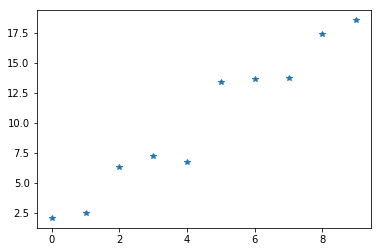

In [154]:
plt.plot(x,y,'*')

In [208]:
# The matrix
m = np.zeros((2,2))
q = np.zeros(2)
m[0,0] = x.size
m[1,0] = x.sum()
m[0,1] = m[1,0]
m[1,1] = np.sum(x**2)

# the right sides
q[0] = y.sum()
q[1] = np.sum(y*x)

# solution of the linear system
a,b = np.linalg.solve(m,q)
print("Statistical estimate of parameters: a=",a," b =",b)

Statistical estimate of parameters: a= 1.5027326906  b = 1.92269936155


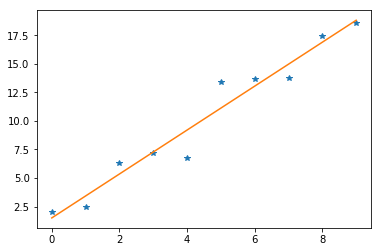

In [209]:
yline = a + b*x
plt.plot(x,y,'*')
plt.plot(x,yline)

<p>
Generalisation of $l'' = 1 / \sigma$ on multi-parameter problem is the Hessian matrix:
$$
H_{ij} = \frac{\partial^2 S}{\partial a \partial b}
$$
</p>
<p>
The "reciprocal value" is the inverse matrix (known as covariance matrix):
$$
C = H^{-1}
$$
</p>

<p>
$$
\mathbf{H} = 2 \left( \begin{array}{cc} N & \sum x_i\\ \sum x_i & \sum x_i^2 \end{array} \right)
$$
</p>


In [252]:
# hessian
h = np.zeros((2,2))
h[0,0] = x.size/2
h[0,1] = np.sum(x)/2
h[1,0] = h[0,1]
h[1,1] = np.sum(x**2)/2
print(h[:,0])
print(h[:,1])


# covariance
cov = np.linalg.inv(h)
print(cov[0,:])
print(cov[1,:])

[  5.   22.5]
[  22.5  142.5]
[ 0.69090909 -0.10909091]
[-0.10909091  0.02424242]


In [211]:
siga = math.sqrt(cov[0,0])
sigb = math.sqrt(cov[1,1])
print("Statistical estimate of a = ",a,"+-",siga)
print("Statistical estimate of a = ",b,"+-",sigb)

Statistical estimate of a =  1.5027326906 +- 0.8312094145936334
Statistical estimate of a =  1.92269936155 +- 0.1556997888323046


In [271]:
# an alternative way
def f(xdata,a,b):
    return a + b*xdata
import scipy.optimize
popt,pcov = scipy.optimize.curve_fit(f,x,y)
aa = popt[0]
bb = popt[1]
sigaa = math.sqrt(pcov[0,0])
sigbb = math.sqrt(pcov[1,1])
print("Statistical estimate of a = ",aa,"+-",sigaa)
print("Statistical estimate of b = ",bb,"+-",sigbb)

Statistical estimate of a =  1.50273269061 +- 0.8199057590101873
Statistical estimate of b =  1.92269936155 +- 0.1535824177455785


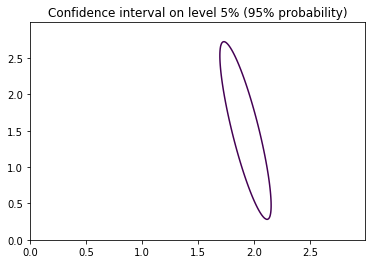

In [280]:
apar = np.arange(0,3,0.01)
bpar = np.arange(0,3,0.01)
nw = apar.size
nh = bpar.size
N = x.size
ss = np.zeros((nw,nh))
for i in range(0,nw):
    for j in range(0,nh):
        q = np.array([apar[i]-a,bpar[j]-b])
        ss[i,j] = math.exp(-(h[0,0]*q[0]**2+(h[0,1]+h[1,0])*q[0]*q[1]+h[1,1]*q[1]**2)/2)/(2*math.pi)
        #print(apar[i],bpar[j],ss[i,j])
u,v = np.meshgrid(apar,bpar)
fig, ax = plt.subplots()
ax.contour(u,v,ss,[scipy.stats.norm.pdf(2)])
ax.set_title('Confidence interval on level 5% (95% probability)')

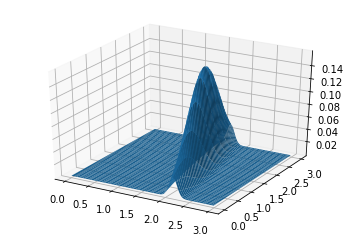

In [284]:
apar = np.arange(0,3,0.01)
bpar = np.arange(0,3,0.01)
nw = apar.size
nh = bpar.size
N = x.size
ss = np.zeros((nw,nh))
for i in range(0,nw):
    for j in range(0,nh):
        q = np.array([apar[i]-a,bpar[j]-b])
        ss[i,j] = math.exp(-(h[0,0]*q[0]**2+(h[0,1]+h[1,0])*q[0]*q[1]+h[1,1]*q[1]**2)/2)/(2*math.pi)
        #print(apar[i],bpar[j],ss[i,j])
u,v = np.meshgrid(apar,bpar)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(u,v,ss)